In [ ]:
# General libraries
import pandas as pd
import numpy as np

# sklearn libraries for preprocessing and feature selection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectPercentile, f_classif

# Libraries for visualisation
import matplotlib.pyplot as plt

## Dataset Information

The NSL-KDD dataset is an improved version of the KDD'99 dataset, widely used for benchmarking intrusion detection systems. It addresses some of the inherent problems of the KDD'99 dataset, such as redundant records. (Tavallaee et al.) For this project, both the KDDTest+.txt and KDDTrain+.txt were used.

In [74]:
# Importing the dataset
dataset_train = pd.read_csv("./Data/KDDTrain+.txt")
dataset_test = pd.read_csv("./Data/KDDTest+.txt")

In [75]:
dataset_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [76]:
dataset_test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [77]:
# Print number of rows and columns in the dataset
print('Dimensions of the Training set:', dataset_train.shape)
print('Dimensions of the Test set:', dataset_test.shape)

Dimensions of the Training set: (125972, 43)
Dimensions of the Test set: (22543, 43)


In [78]:
# attach the column names to the dataset
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack_type","difficulty_level"]

print('Number of column names to add:', len(col_names))

dataset_train = pd.read_csv("./Data/KDDTrain+.txt", header=None, names = col_names)
dataset_test = pd.read_csv("./Data/KDDTest+.txt", header=None, names = col_names)

# Remove 'difficulty_level' column from both training and test sets
dataset_train = dataset_train.drop('difficulty_level', axis=1)
dataset_test = dataset_test.drop('difficulty_level', axis=1)


# shape, this gives the dimensions of the dataset
print('Dimensions of the Training set:', dataset_train.shape)
print('Dimensions of the Test set:', dataset_test.shape)

Number of column names to add: 43
Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


In [79]:
# Shows the first 5 rows of the training dataset
dataset_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [80]:
# Shows the first 5 rows of the test dataset
dataset_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [81]:
# Label Distribution of both the Training and Test set
print('Label distribution Training set:')
print(dataset_train['attack_type'].value_counts())
print()
print('Label distribution Test set:')
print(dataset_test['attack_type'].value_counts())


Label distribution Training set:
attack_type
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Label distribution Test set:
attack_type
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293


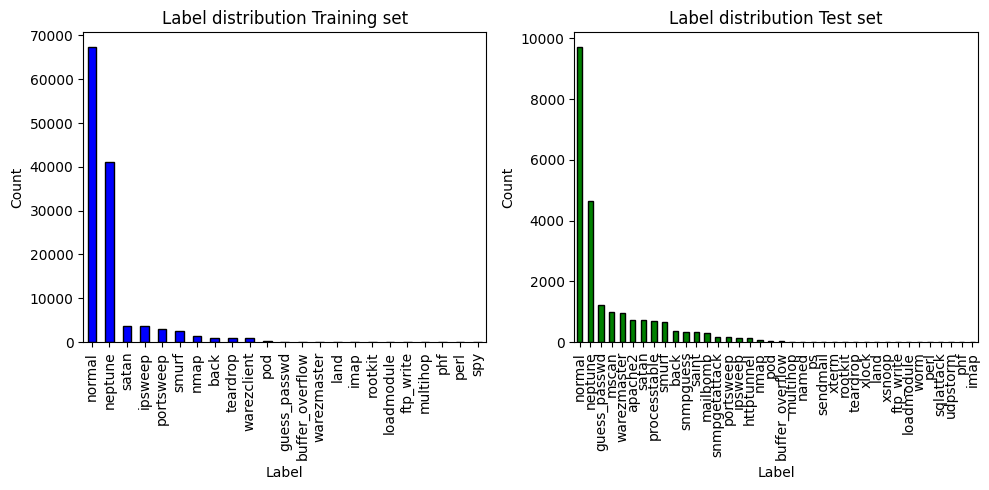

In [82]:
# Get label counts for training set
train_label_counts = dataset_train['attack_type'].value_counts()

# Get label counts for test set
test_label_counts = dataset_test['attack_type'].value_counts()

# Create a new figure
plt.figure(figsize=(10, 5))

# Create a bar plot for training set label distribution
plt.subplot(1, 2, 1)  # 1 row, 2 cols, subplot 1
train_label_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Label distribution Training set')
plt.xlabel('Label')
plt.ylabel('Count')

# Create a bar plot for test set label distribution
plt.subplot(1, 2, 2)  # 1 row, 2 cols, subplot 2
test_label_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('Label distribution Test set')
plt.xlabel('Label')
plt.ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()

### Features
- 41 Features: Includes basic features (e.g., duration, protocol type), content features (e.g., number of failed login attempts), and traffic features (e.g., number of connections to the same host in the past two seconds). (Nkiama et al.)
- Attack Types: The dataset categorises attacks into four main groups: DoS, Probe, R2L, and U2R, alongside normal traffic. (Nkiama et al.)

## Data Cleaning

In [83]:
# Check for missing values in dataset_train
print("Missing values in dataset_train:")
print(dataset_train.isnull().any())

Missing values in dataset_train:
duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerro

In [84]:
# Check for missing values in dataset_test
print("\nMissing values in dataset_test:")
print(dataset_test.isnull().any())


Missing values in dataset_test:
duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerro

In [85]:
duplicate_rows = dataset_train.duplicated()
duplicate_data = dataset_train[duplicate_rows]
print(duplicate_data)

Empty DataFrame
Columns: [duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, attack_type]
Index: []

[0 rows x 42 columns]


In [86]:
dataset_train.drop_duplicates(keep='first')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [87]:
duplicate_rows = dataset_test.duplicated()
duplicate_data = dataset_test[duplicate_rows]
print(duplicate_data)

Empty DataFrame
Columns: [duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, attack_type]
Index: []

[0 rows x 42 columns]


In [88]:
dataset_test.drop_duplicates(keep='first')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


## Data Preprocessing

 Data preprocessing occurs here due to numerical and categorical data in the dataset, and we only want to use numerical data for our models.

### Data Distribution
Unlike its predecessor, the NSL-KDD dataset provides a more balanced representation of different attack types, mitigating the issue of biased learning. (Tavallaee et al.) The dataset contains 24 attack types, with the most common being DoS (Denial of Service) and Probe attacks. The least common attack types are the U2R (User to Root) and R2L (Remote to Local) attacks. Looking at the distribution of attack types of both KDDTrain+ and KDDTest+ it is unbalanced and the values U2R and R2L will be prone to overfitting.

Columns ‘protocol_type’, ‘service’, ‘flag’ and ‘attack_type’ in both data sets all contain non-numerical data and will need to be encoded to numerical values. All other columns contain numerical data.

In this phase, categorical features within the dataset, specifically 'protocol_type', 'service', and 'flag', are identified and prepared for numerical transformation. This is a prerequisite for machine learning algorithms that require numerical input. The unique categories for each feature are extracted, and a structured format is created to facilitate the encoding process.

In [89]:
# Identify categorical features and explore their unique categories in the training set
print('Training set:')
for col_name in dataset_train.columns:
    if dataset_train[col_name].dtypes == 'object':
        unique_cat = len(dataset_train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

# Check the distribution of categories in the 'service' feature
print()
print('Distribution of categories in service:')
print(dataset_train['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'attack_type' has 23 categories

Distribution of categories in service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64


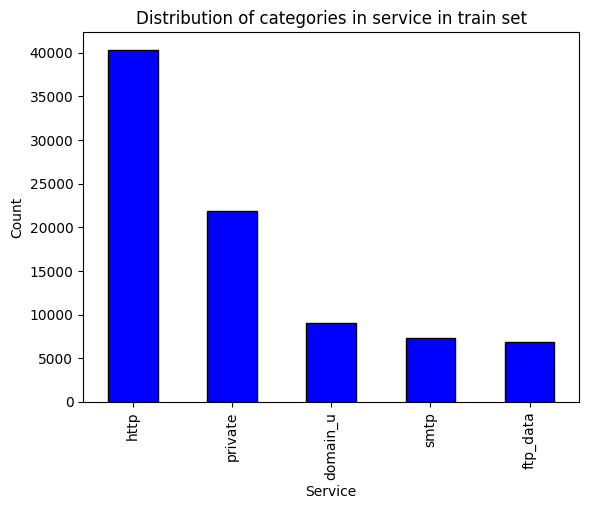

In [90]:
# Get the counts of the top categories in the 'service' column
service_counts = dataset_train['service'].value_counts().sort_values(ascending=False).head()

# Create a bar plot of the counts
service_counts.plot(kind='bar', color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of categories in service in train set')

# Display the plot
plt.show()

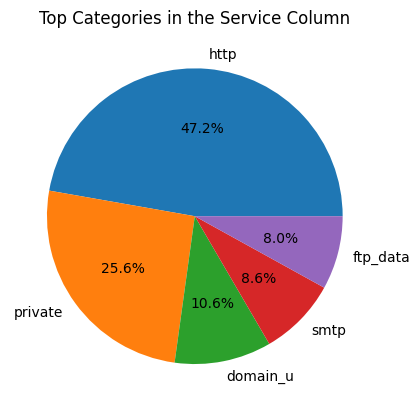

In [91]:
# Get the value counts of the 'service' column
service_counts = dataset_train['service'].value_counts()

# Get the top 5 categories
top_categories = service_counts.head(5)

# Create a pie chart
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%')

# Add a title
plt.title('Top Categories in the Service Column')

# Display the pie chart
plt.show()

In [92]:
# Test set
print('Test set:')
for col_name in dataset_test.columns:
    if dataset_test[col_name].dtypes == 'object' :
        unique_cat = len(dataset_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


# Check the distribution of categories in the 'service' feature
print()
print('Distribution of categories in service:')
print(dataset_test['service'].value_counts().sort_values(ascending=False).head())

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'attack_type' has 38 categories

Distribution of categories in service:
service
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
Name: count, dtype: int64


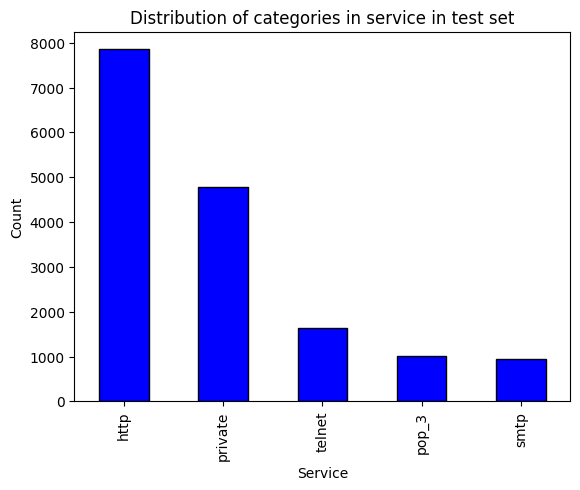

In [93]:
# Get the counts of the top categories in the 'service' column
service_counts = dataset_test['service'].value_counts().sort_values(ascending=False).head()

# Create a bar plot of the counts
service_counts.plot(kind='bar', color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of categories in service in test set')

# Display the plot
plt.show()

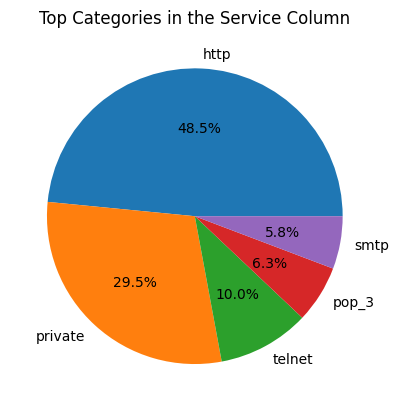

In [94]:
# Get the counts of the top categories in the 'service' column
service_counts = dataset_test['service'].value_counts().head()

# Create a pie chart
plt.pie(service_counts, labels=service_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Top Categories in the Service Column')

# Display the pie chart
plt.show()

In [95]:
# Concatenate the test and train datasets
combined_data = pd.concat([dataset_test, dataset_train])

# Print the unique values of the 'attack_type' column
print(set(combined_data['attack_type']))
print('Attack type values in Training dataset:', set(dataset_train['attack_type']))
print()
print('Attack type values in Test dataset:', set(dataset_test['attack_type']))

{'portsweep', 'buffer_overflow', 'named', 'ps', 'xterm', 'perl', 'sqlattack', 'phf', 'neptune', 'xlock', 'udpstorm', 'normal', 'back', 'loadmodule', 'warezclient', 'guess_passwd', 'xsnoop', 'rootkit', 'mscan', 'apache2', 'processtable', 'mailbomb', 'ipsweep', 'saint', 'spy', 'sendmail', 'httptunnel', 'smurf', 'nmap', 'worm', 'multihop', 'snmpguess', 'snmpgetattack', 'teardrop', 'pod', 'warezmaster', 'imap', 'satan', 'ftp_write', 'land'}
Attack type values in Training dataset: {'portsweep', 'buffer_overflow', 'perl', 'phf', 'neptune', 'normal', 'back', 'warezclient', 'loadmodule', 'guess_passwd', 'rootkit', 'ipsweep', 'spy', 'smurf', 'nmap', 'multihop', 'teardrop', 'pod', 'warezmaster', 'imap', 'satan', 'ftp_write', 'land'}

Attack type values in Test dataset: {'portsweep', 'buffer_overflow', 'named', 'ps', 'xterm', 'perl', 'sqlattack', 'phf', 'neptune', 'xlock', 'udpstorm', 'normal', 'back', 'loadmodule', 'guess_passwd', 'xsnoop', 'rootkit', 'mscan', 'apache2', 'processtable', 'mailbom

In [96]:
attack_types = ['perl', 'worm', 'xlock', 'udpstorm', 'nmap', 'processtable', 'portsweep', 'saint', 'ps', 'mscan', 'guess_passwd', 'land', 'warezclient', 'rootkit', 'satan', 'xterm', 'mailbomb', 'back', 'xsnoop', 'apache2', 'sendmail', 'teardrop', 'phf', 'named', 'smurf', 'pod', 'imap', 'ftp_write', 'normal', 'spy', 'snmpgetattack', 'snmpguess', 'loadmodule', 'multihop', 'neptune', 'warezmaster', 'buffer_overflow', 'httptunnel', 'sqlattack', 'ipsweep']

# Filter the attack_type_counts series to include only the attack types present in the attack_types list
attack_type_counts_all = combined_data['attack_type'].value_counts().loc[attack_types]

print(attack_type_counts_all)

attack_type
perl                   5
worm                   2
xlock                  9
udpstorm               2
nmap                1566
processtable         685
portsweep           3088
saint                319
ps                    15
mscan                996
guess_passwd        1284
land                  25
warezclient          890
rootkit               23
satan               4368
xterm                 13
mailbomb             293
back                1315
xsnoop                 4
apache2              737
sendmail              14
teardrop             904
phf                    6
named                 17
smurf               3311
pod                  242
imap                  12
ftp_write             11
normal             77054
spy                    2
snmpgetattack        178
snmpguess            331
loadmodule            11
multihop              25
neptune            45871
warezmaster          964
buffer_overflow       50
httptunnel           133
sqlattack              2
ipsweep      

## Feature Encoding

In [19]:
# Code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag'] 
 # Get the categorical values into a 2D numpy array
dataset_train_categorical_values = dataset_train[categorical_columns]
dataset_test_categorical_values = dataset_test[categorical_columns]

In [20]:
dataset_train_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


## Make column names for dummies

In [21]:
# Get unique values of protocol type in the training set
unique_protocol = sorted(dataset_train.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2 = [string1 + x for x in unique_protocol]

# Get unique values of service in the training set
unique_service = sorted(dataset_train.service.unique())
string2 = 'service_'
unique_service2 = [string2 + x for x in unique_service]

# Get unique values of flag in the training set
unique_flag = sorted(dataset_train.flag.unique())
string3 = 'flag_'
unique_flag2 = [string3 + x for x in unique_flag]

# Combine the unique values of protocol type, service, and flag
dumcols = unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)
print(len(dumcols))

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [22]:
#do same for test set
unique_service_test=sorted(dataset_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2
print(testdumcols)
print(len(testdumcols))

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_hostnames', 'service_http', 'service_http_443', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_remote_job', 'service_rje', 'service_shell', 'service_smtp', 'service_sql_net', 'service_ssh', 'service_sunrpc'

In [23]:
# Transform categorical features into numbers using LabelEncoder() for train set
dataset_train_categorical_values_enc=dataset_train_categorical_values.apply(LabelEncoder().fit_transform)
print(dataset_train_categorical_values_enc.head())

print()

# Transform categorical features into numbers using LabelEncoder() for test set
dataset_test_categorical_values_enc=dataset_test_categorical_values.apply(LabelEncoder().fit_transform)
print(dataset_test_categorical_values_enc.head())

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9

   protocol_type  service  flag
0              1       45     1
1              1       45     1
2              1       19     9
3              0       13     9
4              1       55     2


## One Hot Encode

The methodology utilises One-Hot Encoding to transform categorical variables into a format that can be provided to machine learning models. This technique creates binary columns for each category/value of the original variable, ensuring the representation of categorical data without implying any ordinality. The implementation uses the OneHotEncoder from the scikit-learn library, which is applied to both the training and test datasets to maintain consistency.

In [24]:
categorical_columns = ['protocol_type', 'service', 'flag']

# Initialise OneHotEncoder
enc = OneHotEncoder(handle_unknown='error')

# Fit the encoder on the training data and transform it
dataset_train_categorical_values_fit_enc = enc.fit_transform(dataset_train[categorical_columns])

# Convert the encoded values to a dataframe and assign column names
dataset_train_categorical_data = pd.DataFrame(dataset_train_categorical_values_fit_enc.toarray(), columns=enc.get_feature_names_out(categorical_columns))

# Transform the test data using the same encoder
dataset_test_categorical_values_fit_enc = enc.transform(dataset_test[categorical_columns])

# Convert the encoded values to a dataframe
# Ensure the test set columns match the training set
dataset_test_categorical_data = pd.DataFrame(dataset_test_categorical_values_fit_enc.toarray(), columns=dataset_train_categorical_data.columns)

# Drop original categorical columns from the datasets
dataset_train = dataset_train.drop(categorical_columns, axis=1)
dataset_test = dataset_test.drop(categorical_columns, axis=1)

# Concatenate the new one-hot encoded columns with the original datasets
dataset_train_final = pd.concat([dataset_train, dataset_train_categorical_data], axis=1)
dataset_test_final = pd.concat([dataset_test, dataset_test_categorical_data], axis=1)


In [25]:
# Print the shape of the new dataframe to check the number of rows and columns
print(dataset_train_final.shape)

# Print the shape of the new test dataframe to check the number of rows and columns
print(dataset_test_final.shape)

(125973, 123)
(22544, 123)


In [26]:
dataset_train_final.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
dataset_test_final.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,12983,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,20,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,15,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split Dataset into 4 datasets for every attack category

In [ ]:
def categorise_attacks(df):
    # Mapping of attacks to categories
    # http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types
    attack_mapping = {
        'normal': 0,
        'neptune': 1, 'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,
        'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
        'ipsweep': 2, 'nmap': 2, 'portsweep': 2, 'satan': 2, 'mscan': 2, 'saint': 2,
        'ftp_write': 3, 'guess_passwd': 3, 'imap': 3, 'multihop': 3, 'phf': 3, 'spy': 3,
        'warezclient': 3, 'warezmaster': 3, 'sendmail': 3, 'named': 3, 'snmpgetattack': 3,
        'snmpguess': 3, 'xlock': 3, 'xsnoop': 3, 'httptunnel': 3,
        'buffer_overflow': 4, 'loadmodule': 4, 'perl': 4, 'rootkit': 4, 'ps': 4,
        'sqlattack': 4, 'xterm': 4
    }

    # Replace the 'attacktype' column based on the mapping
    df['attack_type'] = df['attack_type'].map(attack_mapping)

# Apply the function to both datasets
categorise_attacks(dataset_train_final)
categorise_attacks(dataset_test_final)

In [29]:
# Function to segment the dataset
def segment_dataset(dataset, attack_types):
    segmented_data = {}
    for attack_type in attack_types:
        segmented_data[attack_type] = dataset[dataset['attack_type'].isin(attack_types[attack_type])]
    return segmented_data

# Define the attack types and their corresponding labels
attack_types = {
    'DoS': [0, 1],
    'Probe': [0, 2],
    'R2L': [0, 3],
    'U2R': [0, 4]
}

# Segment the training dataset
train_segments = segment_dataset(dataset_train_final, attack_types)
dataset_train_DoS = train_segments['DoS']
dataset_train_Probe = train_segments['Probe']
dataset_train_R2L = train_segments['R2L']
dataset_train_U2R = train_segments['U2R']

# Segment the testing dataset
test_segments = segment_dataset(dataset_test_final, attack_types)
dataset_test_DoS = test_segments['DoS']
dataset_test_Probe = test_segments['Probe']
dataset_test_R2L = test_segments['R2L']
dataset_test_U2R = test_segments['U2R']

# Print the dimensions of the new datasets
print('Train Set Dimensions:')
print(f'DoS: {dataset_train_DoS.shape}')
print(f'Probe: {dataset_train_Probe.shape}')
print(f'R2L: {dataset_train_R2L.shape}')
print(f'U2R: {dataset_train_U2R.shape}')

print('\nTest Set Dimensions:')
print(f'DoS: {dataset_test_DoS.shape}')
print(f'Probe: {dataset_test_Probe.shape}')
print(f'R2L: {dataset_test_R2L.shape}')
print(f'U2R: {dataset_test_U2R.shape}')

Train Set Dimensions:
DoS: (113270, 123)
Probe: (78999, 123)
R2L: (68338, 123)
U2R: (67395, 123)

Test Set Dimensions:
DoS: (17171, 123)
Probe: (12132, 123)
R2L: (12596, 123)
U2R: (9778, 123)


## Feature Scaling

Feature scaling is performed using StandardScaler, normalising the feature values to have a mean of zero and a standard deviation of one. This procedure is conducted independently on different segments of the dataset (DoS, Probe, R2L, U2R) to account for possible variations in data distribution across these segments.

In [30]:
# Split dataframes into X & Y
# assign X as a dataframe of features and Y as a series of outcome variables
X_DoS = dataset_train_DoS.drop('attack_type',axis=1)
Y_DoS = dataset_train_DoS.attack_type
X_Probe = dataset_train_Probe.drop('attack_type',axis=1)
Y_Probe = dataset_train_Probe.attack_type
X_R2L = dataset_train_R2L.drop('attack_type',axis=1)
Y_R2L = dataset_train_R2L.attack_type
X_U2R = dataset_train_U2R.drop('attack_type',axis=1)
Y_U2R = dataset_train_U2R.attack_type

# Test Set
X_DoS_test = dataset_test_DoS.drop('attack_type',axis=1)
Y_DoS_test = dataset_test_DoS.attack_type
X_Probe_test = dataset_test_Probe.drop('attack_type',axis=1)
Y_Probe_test = dataset_test_Probe.attack_type
X_R2L_test = dataset_test_R2L.drop('attack_type',axis=1)
Y_R2L_test = dataset_test_R2L.attack_type
X_U2R_test = dataset_test_U2R.drop('attack_type',axis=1)
Y_U2R_test = dataset_test_U2R.attack_type

In [31]:
scaler = StandardScaler()

X_DoS = scaler.fit_transform(X_DoS)
X_DoS_test = scaler.fit_transform(X_DoS_test)

X_Probe = scaler.fit_transform(X_Probe)
X_Probe_test = scaler.fit_transform(X_Probe_test)

X_R2L = scaler.fit_transform(X_R2L)
X_R2L_test = scaler.fit_transform(X_R2L_test)

X_U2R = scaler.fit_transform(X_U2R)
X_U2R_test = scaler.fit_transform(X_U2R_test)

### Check that the Standard Deviation is 1 for X data frames

In [32]:
print(np.std(X_DoS, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1.]


In [33]:
X_DoS.shape

(113270, 122)

In [34]:
print(np.std(X_DoS_test, axis=0))

[1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0.]


In [35]:
X_DoS_test.shape

(17171, 122)

In [36]:
print(np.std(X_Probe, axis=0))

[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [37]:
X_Probe.shape

(78999, 122)

In [38]:
print(np.std(X_Probe_test, axis=0))

[1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [39]:
X_Probe_test.shape

(12132, 122)

In [40]:
print(np.std(X_R2L, axis=0))

[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1.]


In [41]:
X_R2L.shape

(68338, 122)

In [42]:
print(np.std(X_R2L_test, axis=0))

[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0.]


In [43]:
X_R2L_test.shape

(12596, 122)

In [44]:
print(np.std(X_U2R, axis=0))

[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1.]


In [45]:
X_U2R.shape

(67395, 122)

In [46]:
print(np.std(X_U2R_test, axis=0))

[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0.]


In [47]:
X_U2R_test.shape

(9778, 122)

## Feature Selection

In [48]:
# Ignore divide by zero and invalid value warnings
np.seterr(divide='ignore', invalid='ignore')

# Create a selector object using SelectPercentile with f_classif scoring function
# Select the top 10% of features based on their ANOVA F-value
selector = SelectPercentile(f_classif, percentile=10)

X_newDoS = selector.fit_transform(X_DoS, Y_DoS)
X_newDoS_test = selector.transform(X_DoS_test)

X_newProbe = selector.fit_transform(X_Probe,Y_Probe)
X_newProbe_test = selector.transform(X_Probe_test)

X_newR2L = selector.fit_transform(X_R2L,Y_R2L)
X_newR2L_test = selector.transform(X_R2L_test)

X_newU2R = selector.fit_transform(X_U2R,Y_U2R)
X_newU2R_test = selector.transform(X_U2R_test)

c:\Users\kaial\Development\Projects\Traffic-Analysis-ML\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 16  44  63  66  68  86 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\kaial\Development\Projects\Traffic-Analysis-ML\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 4 16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\kaial\Development\Projects\Traffic-Analysis-ML\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [  4  16  43  44  46  47  48  49  50  51  54  57  58  62  63  64  66  67
  68  70  71  72  73  74  76  77  78  79  80  81  82  83  86  87  89  92
  93  96  98  99 100 107 108 109 110 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\kai